In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
%matplotlib inline

In [185]:
# Point plot
def plotLabel(df):
    fig, ax = plt.subplots()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    for label in df.groupby("label").count().index:
        tempX = df[df.label == label]
        ax.plot(tempX.x, tempX.y, ls="", marker="o", alpha=0.5)

# Image plot
def imshowLabel(im):
    fig, ax = plt.subplots()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.imshow(im, cmap="viridis", interpolation="sinc", alpha=0.5)

def display(df, im):
    fig, ax = plt.subplots()
    ax.yaxis.set_major_locator(plt.NullLocator())
    ax.xaxis.set_major_locator(plt.NullLocator())    
    ax.imshow(im, cmap="viridis", interpolation="sinc", alpha=0.5, extent=(-10,10,0,10))
    for label in df.groupby("label").count().index:
        tempX = df[df.label == label]
        ax.plot(tempX.x, tempX.y, ls="", marker="o", alpha=0.5)

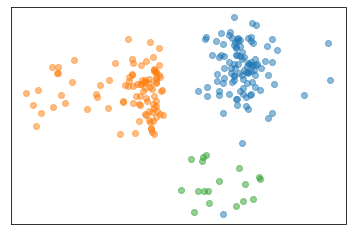

In [176]:
# Dataframe
df = pd.read_csv("_kNN/data copy.csv")

# Feature matrix
X = df[["x", "y"]]
# Target array
y = df["label"]

# Plot original points
plotLabel(df=df)

In [147]:
# kNN model
model = KNeighborsClassifier(n_neighbors=1)

# Train
# Holdout sets
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5)
model.fit(X1, y1)
y2_model = model.predict(X2)
train_test_split_accuracy = accuracy_score(y2, y2_model)
# Cross validation
model.fit(X, y)
cross_validation_accuracy = cross_val_score(model, X, y, cv=5).mean()

pd.DataFrame({"Training_score": [train_test_split_accuracy, cross_validation_accuracy]}, index=["train_test_split", "cross_validation"])

,Training_score
train_test_split,0.990826
cross_validation,0.981712


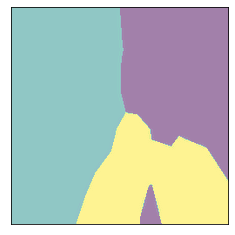

In [188]:
# Point grid
xfit = np.linspace(-10, 10, 250)
yfit = np.linspace(0, 10, 250)
Xfit, Yfit = np.meshgrid(xfit, yfit)
fit = np.column_stack((Xfit.flatten(), Yfit.flatten()))

# Predict labels
label_fit = model.predict(fit)
# Plot predicted point labels
imshowLabel(im=np.flip(label_fit.reshape((250, 250)), axis=0))

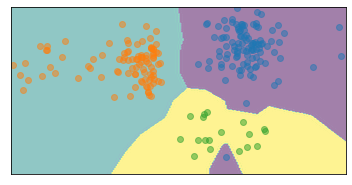

In [189]:
# Display point and prediction
display(df=df, im=np.flip(label_fit.reshape((250, 250)), axis=0))